# Lab Notebook 17: Nonlinear PCA and Stochastic Neighbor Embedding

In this short notebook, we will explore several extensions of PCA and try out T-SNE, another popular dimensionality reduction technique.

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

import matplotlib
font = {'size'   : 16}
matplotlib.rc('font', **font)
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 
matplotlib.rcParams['figure.dpi'] = 100
matplotlib.rcParams['figure.figsize'] = [10, 8] 

## Step 1:

Load the breast cancer dataset from the sklearn datasets library. We already looked at that one in one homework assignment. It contains 569 examples with 30 features each. The target is a binary class label, malignant or not.

Perform linear PCA on the dataset. Remember that the mean of every column must be zero. Plot the explained variance ratio, is PCA meaningful? 

#### Yes PCA is meaningful, the evr decreases quite rapidly as components increase

Make a scatter plot of the first two principal components, while colouring the data points with the class label. Can PCA separate the two classes? How much variance is explained by the first two components alone?

#### Yes PCA does separate the two classes

#### Explain variance: The first two components have the largest varience, 0.44 for the first, and 0.19 for the second 

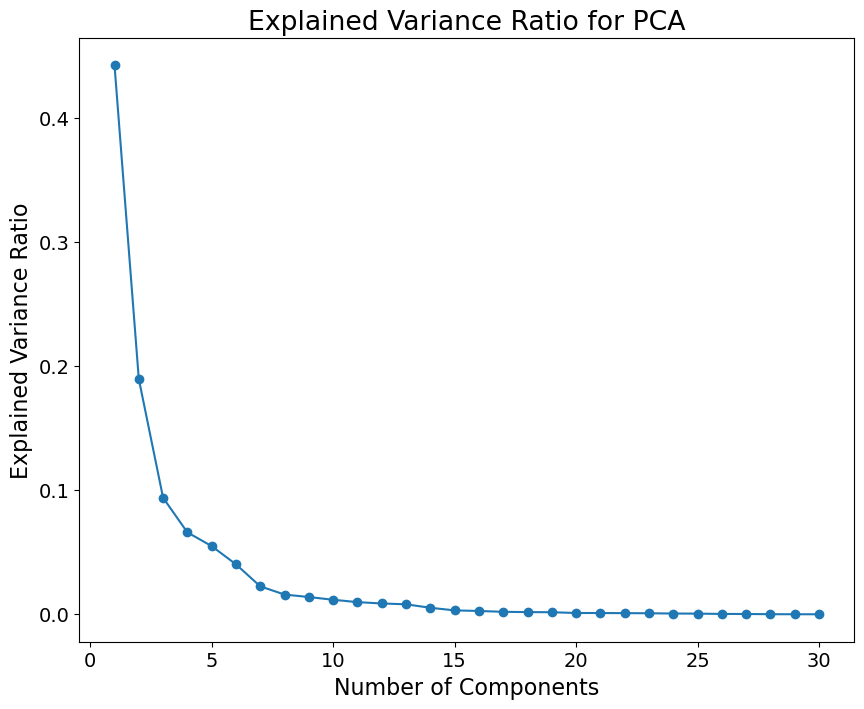

In [37]:
breast_cancer = datasets.load_breast_cancer()
X = breast_cancer.data
y = breast_cancer.target

X_scaled = StandardScaler().fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

evr_cancer = pca.explained_variance_ratio_

plt.plot(range(1, len(evr_cancer)+1), evr_cancer, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio for PCA')
plt.show()

Variance explained by the first component: 0.44
Variance explained by the second component: 0.19


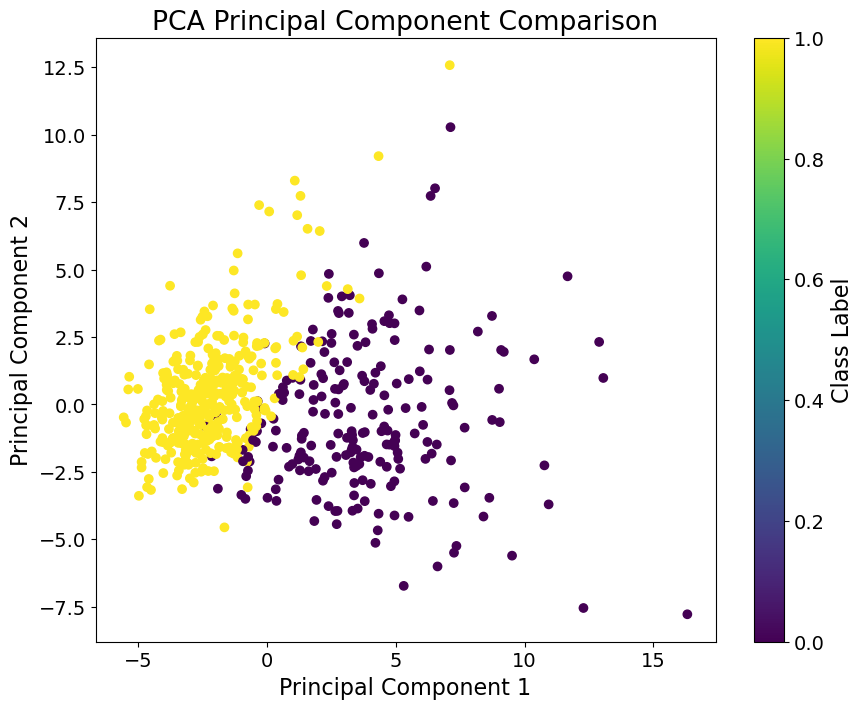

In [38]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("PCA Principal Component Comparison")
plt.colorbar(label='Class Label')



print("Variance explained by the first component: {:.2f}".format(evr_cancer[0]))
print("Variance explained by the second component: {:.2f}".format(evr_cancer[1]))


## Step 2:

We are now going to add nonlinear polynomial features to the dataset. Let us consider a second order polynomial map $$ \textbf{x}→(1,x_1,…,x_d,x_1^2,…x^2_d,x_1x_2,x_1x_3,…),$$
which effectively adds a square of the number of features.

You can use the utility **PolynomialFeatures** from preprocessing for this purpose, familiar from week 1. 

Then perform PCA on this dataset (without any additional scaling of the added features) and plot the first two PCA components. Any improvement?

#### No improvement

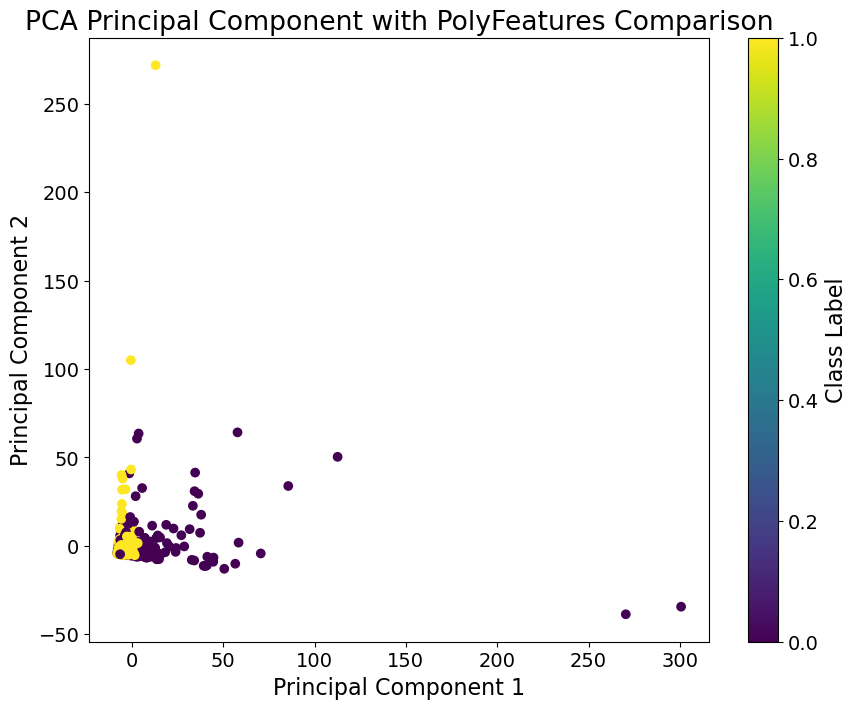

In [39]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)

pca_poly = PCA()
X_pca_poly = pca_poly.fit_transform(X_poly)

plt.scatter(X_pca_poly[:, 0], X_pca_poly[:, 1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("PCA Principal Component with PolyFeatures Comparison")
plt.colorbar(label='Class Label')

## Step 3:

Creating the polynomical features should be equivalent to performing a kernelPCA with a 'poly' kernel of degree 2. Use sklearn's KernelPCA and plot again the first two PCA components. Do they agree with your previous plot?

#### No, they do not agree

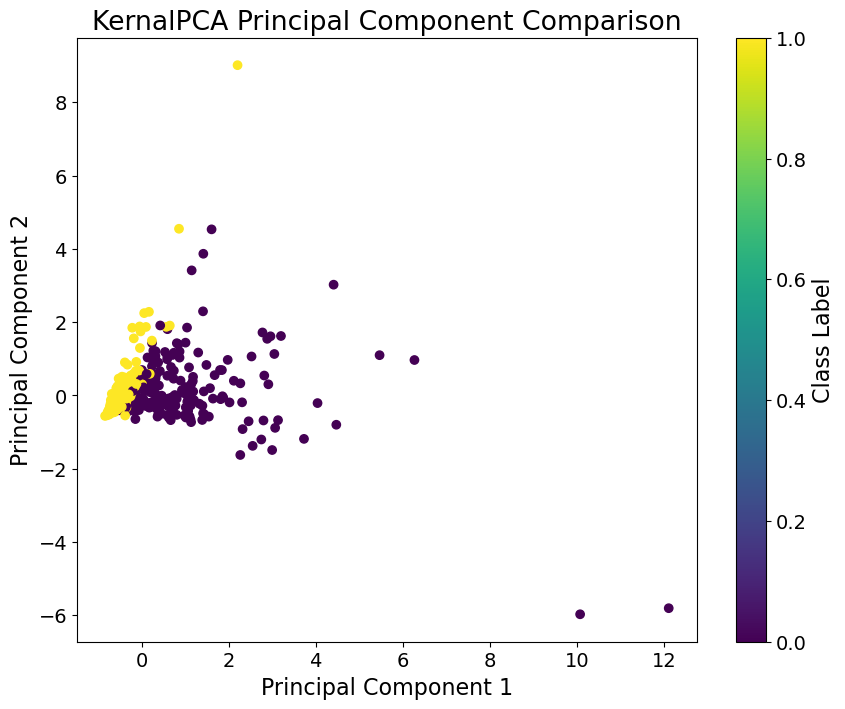

In [40]:
kpca_poly = KernelPCA(kernel='poly', degree=2)
X_kpca_poly = kpca_poly.fit_transform(X_scaled)

plt.scatter(X_kpca_poly[:, 0], X_kpca_poly[:, 1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("KernalPCA Principal Component Comparison")
plt.colorbar(label='Class Label')

## Step 4:

Let's replace the polynomial kernel with the rbf kernel, and make the same plot. You have to adjust the value of the gamma parameter to get good results.

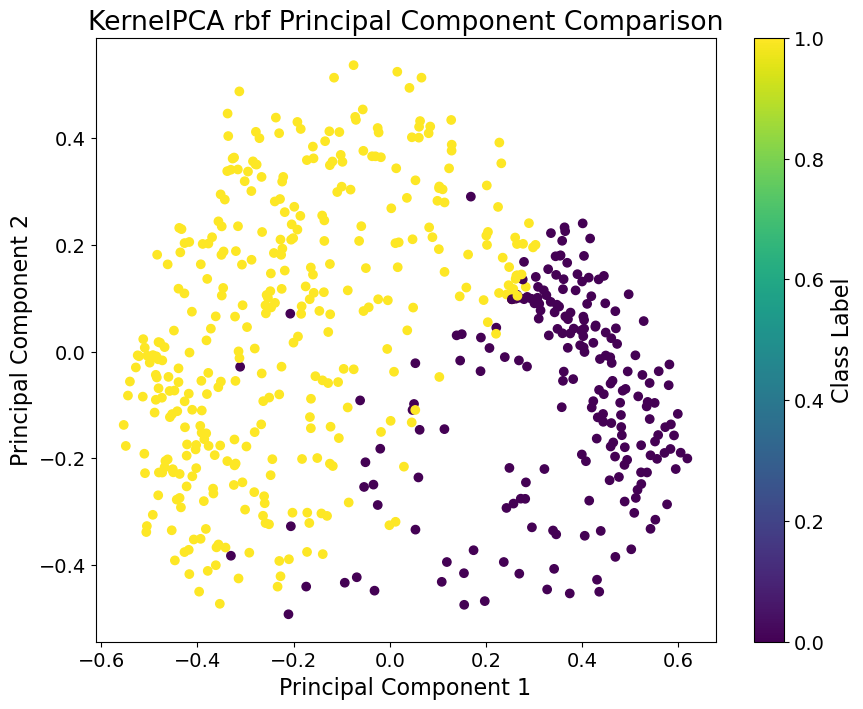

In [41]:
gamma_value = 0.05

kpca_rbf = KernelPCA(kernel='rbf', gamma=gamma_value)
X_kpca_rbf = kpca_rbf.fit_transform(X_scaled)

plt.scatter(X_kpca_rbf[:, 0], X_kpca_rbf[:, 1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("KernelPCA rbf Principal Component Comparison")
plt.colorbar(label='Class Label')

## Step 5:

Lastly, let's check out T-SNE (https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding) from the manifold package. It is a very different approach but can sometimes be useful when PCA fails. Set **n_components=2, n_iter=500** (It takes a few seconds). How does the method do on our dataset, again looking at the first two components?

#### It does good compared to the others :)

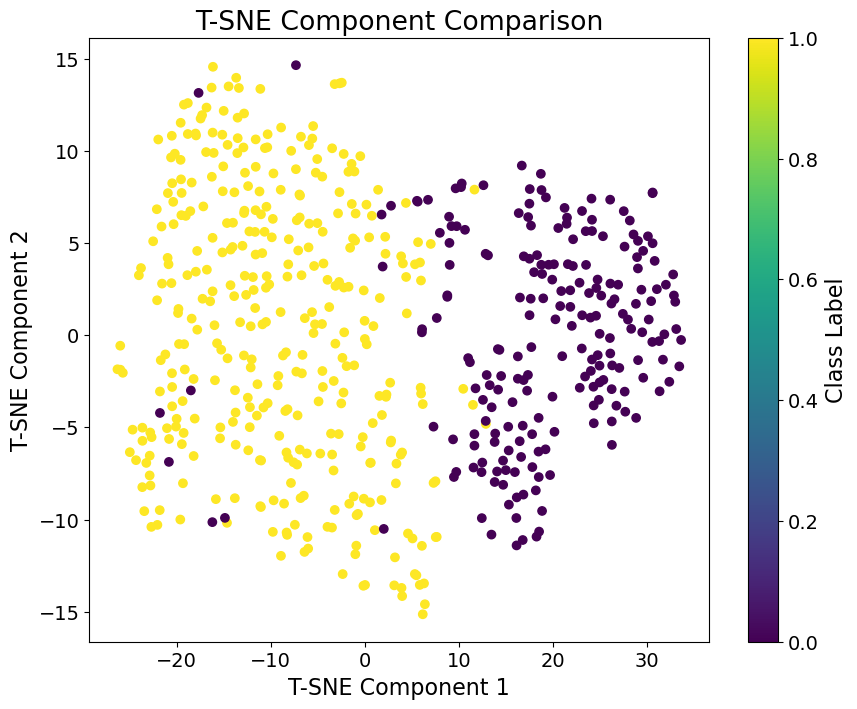

In [42]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, n_iter=500)

X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.xlabel('T-SNE Component 1')
plt.ylabel('T-SNE Component 2')
plt.title("T-SNE Component Comparison")
plt.colorbar(label='Class Label')